In [182]:
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy.core.event import Origin
from obspy import UTCDateTime, Stream
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [147]:
client = Client("ORFEUS")
client1 = Client("KOERI")

# client = Client("KOERI")
# client = RoutingClient("eida-routing")

In [141]:
client.help('station')

Parameter description for the 'station' service (v1.2.0) of 'http://www.orfeus-eu.org':
The service offers the following optional standard parameters:
    startbefore (UTCDateTime)
    startafter (UTCDateTime)
    endbefore (UTCDateTime)
    endafter (UTCDateTime)
    latitude (float)
    longitude (float)
    minradius (float)
    maxradius (float)
    includerestricted (bool)
    includeavailability (bool)
    format (str), Default value: xml, Choices: xml, text, fdsnxml, stationxml, sc3ml
The service offers the following non-standard parameters:
    formatted (bool)


In [119]:
print (dir(cfeature))

['ABCMeta', 'AdaptiveScaler', 'BORDERS', 'COASTLINE', 'COLORS', 'Feature', 'GSHHSFeature', 'LAKES', 'LAND', 'NaturalEarthFeature', 'OCEAN', 'RIVERS', 'STATES', 'Scaler', 'ShapelyFeature', 'WFSFeature', '_NATURAL_EARTH_GEOM_CACHE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'abstractmethod', 'cartopy', 'division', 'np', 'print_function', 'sgeom', 'shapereader', 'six']


In [9]:
from obspy.clients.fdsn.header import URL_MAPPINGS
for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<8} {1}".format(key, URL_MAPPINGS[key]))

BGR      http://eida.bgr.de
EMSC     http://www.seismicportal.eu
ETH      http://eida.ethz.ch
GEONET   http://service.geonet.org.nz
GFZ      http://geofon.gfz-potsdam.de
ICGC     http://ws.icgc.cat
INGV     http://webservices.ingv.it
IPGP     http://ws.ipgp.fr
IRIS     http://service.iris.edu
ISC      http://isc-mirror.iris.washington.edu
KNMI     http://rdsa.knmi.nl
KOERI    http://eida.koeri.boun.edu.tr
LMU      http://erde.geophysik.uni-muenchen.de
NCEDC    http://service.ncedc.org
NIEP     http://eida-sc3.infp.ro
NOA      http://eida.gein.noa.gr
ODC      http://www.orfeus-eu.org
ORFEUS   http://www.orfeus-eu.org
RASPISHAKE http://fdsnws.raspberryshakedata.com
RESIF    http://ws.resif.fr
SCEDC    http://service.scedc.caltech.edu
TEXNET   http://rtserve.beg.utexas.edu
USGS     http://earthquake.usgs.gov
USP      http://sismo.iag.usp.br


In [3]:
minlong=32
maxlong=35
minlat=34
maxlat=36

In [4]:
starttime =UTCDateTime("2000-01-01T00:00:00")
endtime= UTCDateTime("2019-11-18T00:00:00")

In [142]:
events=client.get_events(starttime=starttime,endtime=endtime,minlatitude=minlat,maxlatitude=maxlat,minlongitude=minlong,maxlongitude=maxlong,
                 minmagnitude=4.5)
print(events.__str__(print_all=True))

10 Event(s) in Catalog:
2018-10-29T12:09:13.900000Z | +34.420,  +33.530 | 4.9 mb
2017-03-18T18:15:28.800000Z | +34.420,  +32.220 | 4.5 mb
2016-01-05T07:17:15.000000Z | +34.250,  +32.680 | 4.5 ml
2015-07-30T15:04:10.200000Z | +34.220,  +33.620 | 4.7 mb
2015-04-15T08:25:13.100000Z | +34.740,  +32.390 | 5.5 mb
2014-06-19T20:30:47.900000Z | +35.760,  +32.020 | 4.6 ml
2012-05-11T18:48:30.100000Z | +34.250,  +34.170 | 5.5 mb
2009-09-16T14:09:42.200000Z | +34.726,  +33.135 | 4.6 ML
2009-08-25T06:28:37.100000Z | +34.722,  +32.935 | 4.6 mb
2006-10-15T01:35:10.600000Z | +34.890,  +33.967 | 4.8 mb


In [6]:
events.write("text.xml",format="QUAKEML")

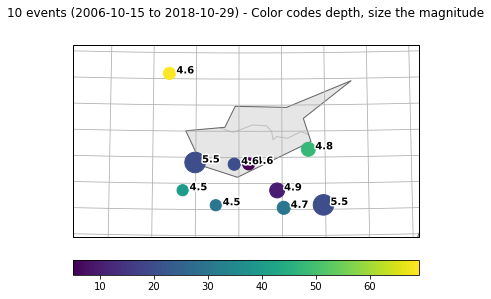

In [320]:
events.plot(projection='local');

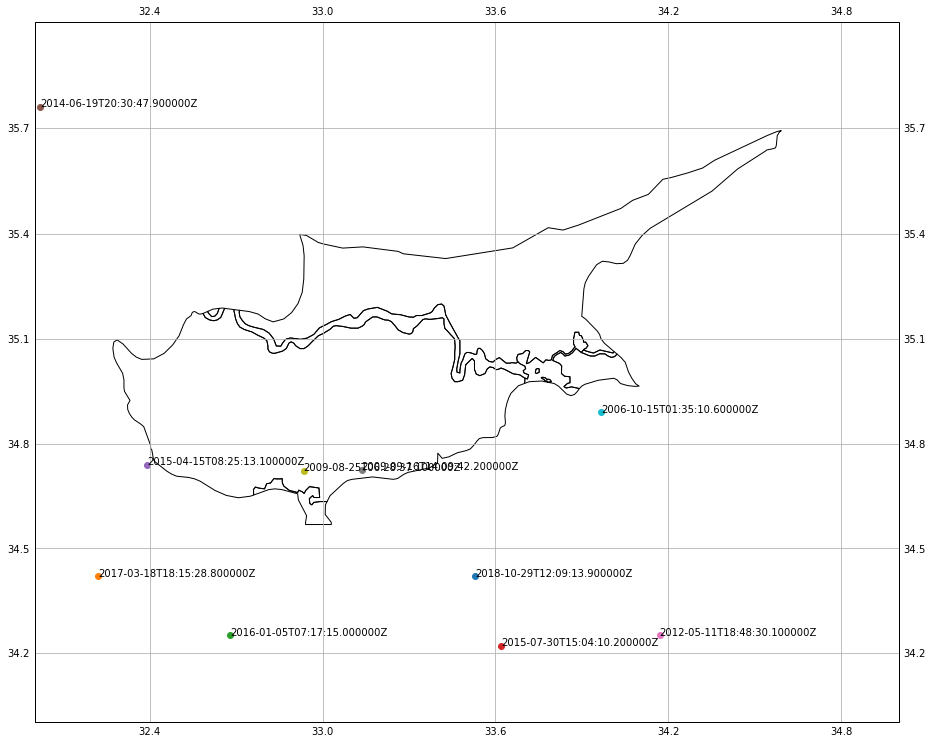

In [144]:
fig=plt.figure(figsize=(15,15));
cen_lat = (minlat+maxlat)/2,;
cen_long = (minlong+maxlong)/2;

# proj=ccrs.AlbersEqualArea(central_latitude=cen_lat,central_longitude=cen_long)
proj=ccrs.Mercator()

map_ax = fig.add_axes([0.1,0.1,0.8,0.8],projection=proj)

extent=[32, 35, 34, 36]
# map_ax.coastlines(resolution='10m')

map_ax.set_extent(extent);

# map_ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='black',))
# map_ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m',edgecolor='black',))

map_ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries',
                                                scale='10m',edgecolor='black',facecolor='none'))

for ev in range(len(events)):
    lat_o = events.events[ev].origins[0].latitude
    long_o = events.events[ev].origins[0].longitude
    label = events.events[ev].origins[0].time
#     print (label)
    map_ax.scatter(long_o,lat_o,transform = proj.as_geodetic())
    map_ax.text(long_o,lat_o,label,transform=proj.as_geodetic())
    
# map_ax.scatter(33,35,transform = proj.as_geodetic())  

map_ax.gridlines(draw_labels=True)


In [30]:
events.write('events.xml',format="QUAKEML")

In [115]:
t = UTCDateTime("2014-06-19T20:30:47")
# end = UTCDateTime("2017-01-13T21:43:31")

In [353]:
a=client1.get_stations(network="KO", station="AKDN",minlatitude=minlat,maxlatitude=maxlat,
                     minlongitude=minlong,maxlongitude=maxlong,starttime=t-60,endtime=t+60*5,
                       level="response")
a

Inventory created at 2020-04-08T14:00:33.057658Z
	Sending institution: SeisComP3 (KOERI)
	Contains:
		Networks (1):
			KO
		Stations (1):
			KO.AKDN (Akdeniz-KKKTC)
		Channels (3):
			KO.AKDN..HNZ, KO.AKDN..HNN, KO.AKDN..HNE

In [349]:
cc = a[0][1][2]
cc

Channel 'HNZ', Location '' 
	Time range: 2008-01-01T00:00:00.000000Z - --
	Latitude: 35.01, Longitude: 33.47, Elevation: 225.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Sampling Rate: 100.00 Hz
	Sensor (Description): 100 (100)
	Response information available

In [340]:
cc.sample_rate

100.0

In [271]:
a.write('station.txt',"STATIONTXT")

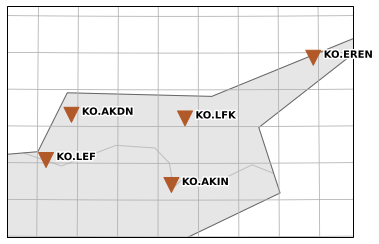

In [191]:
a.plot(projection="local");

In [421]:
inv_AKDN = client1.get_stations(network="KO",station="AKDN",starttime=t-60,endtime=t+60,level="response",channel="*")
stream_AKDN = client1.get_waveforms(network="KO",station="AKDN",location="*",channel="*",starttime=t-60,endtime=t+60*5)
stream_AKDN

4 Trace(s) in Stream:
KO.AKDN..HNE | 2014-06-19T20:29:47.000000Z - 2014-06-19T20:35:47.000000Z | 100.0 Hz, 36001 samples
KO.AKDN..HNN | 2014-06-19T20:29:47.000000Z - 2014-06-19T20:35:47.000000Z | 100.0 Hz, 36001 samples
KO.AKDN..HNZ | 2014-06-19T20:29:47.000000Z - 2014-06-19T20:32:02.990000Z | 100.0 Hz, 13600 samples
KO.AKDN..HNZ | 2014-06-19T20:32:13.000000Z - 2014-06-19T20:35:47.000000Z | 100.0 Hz, 21401 samples

In [166]:
# inv_EREN = client.get_stations(network="KO",station="EREN",starttime=t-10,endtime=t+60*2,level="response",channel="*")
# stream_EREN = client.get_waveforms(network="KO",station="EREN",location="*",channel="*",starttime=t-10,endtime=t+60*2)


In [167]:
# inv_LFK = client.get_stations(network="KO",station="LFK",starttime=t-10,endtime=t+60*2,level="response",channel="*")
# stream_LFK = client.get_waveforms(network="KO",station="LFK",location="*",channel="*",starttime=t-10,endtime=t+60*2)

In [356]:
# stream_LFK.merge()
# stream_LFK

In [422]:
inv2=inv_AKDN.copy()
stream2=stream_AKDN.copy()

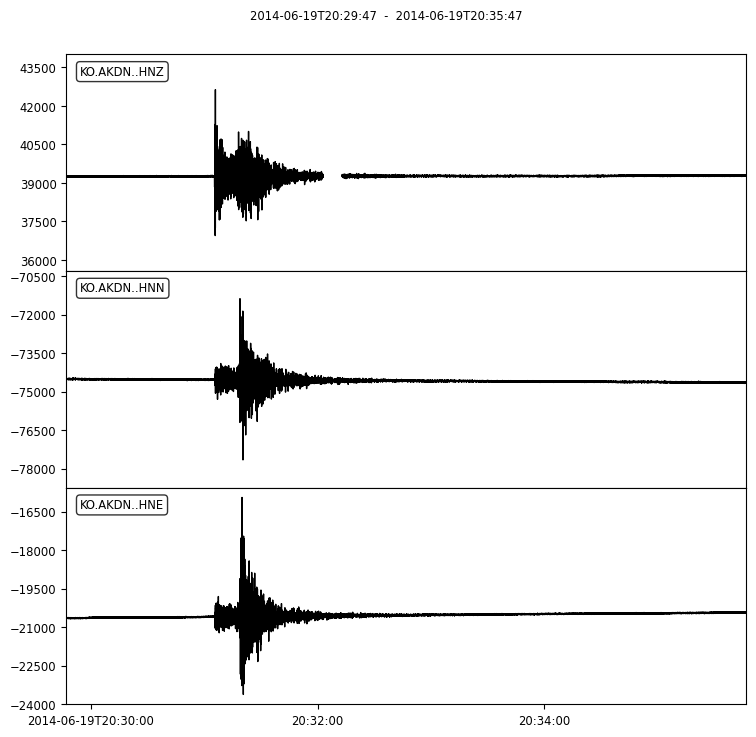

In [423]:
stream2.plot();

In [424]:
stream2.attach_response(inv2)
# st_EREN.attach_response(inv_EREN)
# st_LFK.attach_response(inv_LFK)

[]

In [425]:
AKDN_removed = stream2.remove_response(output='ACC',pre_filt=(1.0 / 100.0, 1.0 / 50.0, 10.0, 20.0))
# EREN_removed = st_EREN.remove_response(output='ACC')
# LFK_removed = st_LFK.remove_response(output='ACC')


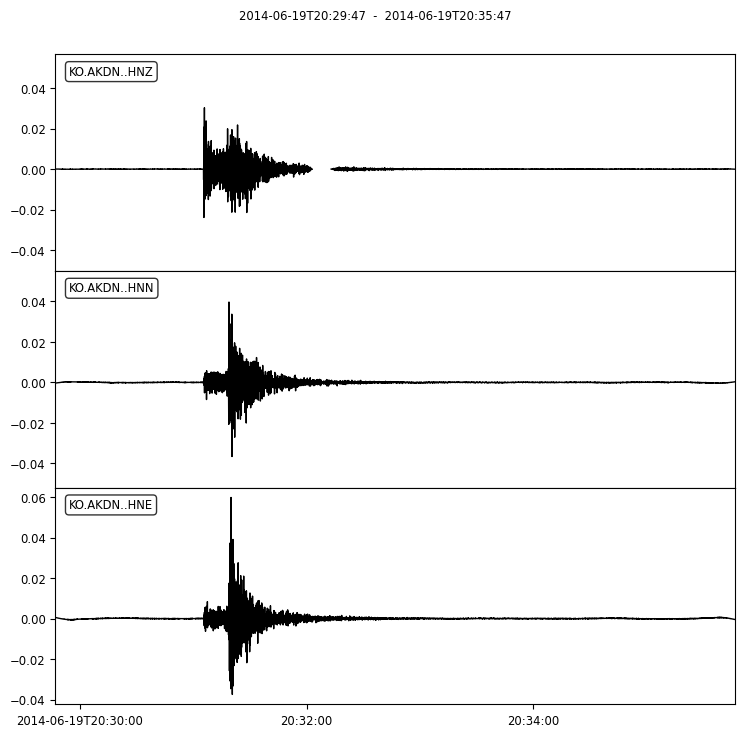

In [426]:
AKDN_removed.plot();
# EREN_removed.plot(outfile="EREN_RESPONSE.PNG")
# LFK_removed.plot(outfile="LFK_RESPONSE.PNG")
# plt.close()

In [174]:
import numpy as np

In [ ]:
channels = inv.get_contents().get('channels')
for i in range(3):
    test[i].write("{} {}".format(channels[i],'response.ascii'), format='TSPAIR')

In [176]:
channels_AKDN = inv_AKDN.get_contents().get('channels')
channels_EREN = inv_EREN.get_contents().get('channels')
channels_LFK = inv_LFK.get_contents().get('channels')


for i in range(3):
    AKDN_removed[i].write("{}{}".format(channels_AKDN[i],'_Response.ascii'),  format='TSPAIR')
    np.savetxt("{}{}.txt".format(channels_AKDN[i],'_Response'),np.array(AKDN_removed[i]))    
    EREN_removed[i].write("{}{}".format(channels_EREN[i],'_Response.ascii'),  format='TSPAIR')
    np.savetxt("{}{}.txt".format(channels_EREN[i],'_Response'),np.array(EREN_removed[i]))
    LFK_removed[i].write("{}{}".format(channels_LFK[i],'_Response.ascii'),  format='TSPAIR')
    np.savetxt("{}{}.txt".format(channels_LFK[i],'_Response'),np.array(LFK_removed[i]))    


In [154]:
LFK_removed

15 Trace(s) in Stream:
KO.LFK..HHE | 2017-01-13T21:43:19.290000Z - 2017-01-13T21:43:49.990000Z | 100.0 Hz, 3071 samples
KO.LFK..HHE | 2017-01-13T21:43:55.000000Z - 2017-01-13T21:43:59.990000Z | 100.0 Hz, 500 samples
KO.LFK..HHE | 2017-01-13T21:43:50.000000Z - 2017-01-13T21:43:54.990000Z | 100.0 Hz, 500 samples
KO.LFK..HHE | 2017-01-13T21:44:00.000000Z - 2017-01-13T21:45:31.010000Z | 100.0 Hz, 9102 samples
KO.LFK..HHN | 2017-01-13T21:43:17.400000Z - 2017-01-13T21:44:26.990000Z | 100.0 Hz, 6960 samples
KO.LFK..HHN | 2017-01-13T21:44:32.000000Z - 2017-01-13T21:44:36.990000Z | 100.0 Hz, 500 samples
KO.LFK..HHN | 2017-01-13T21:44:27.000000Z - 2017-01-13T21:44:31.990000Z | 100.0 Hz, 500 samples
KO.LFK..HHN | 2017-01-13T21:44:37.000000Z - 2017-01-13T21:45:32.670000Z | 100.0 Hz, 5568 samples
KO.LFK..HHZ | 2017-01-13T21:43:18.760000Z - 2017-01-13T21:45:32.380000Z | 100.0 Hz, 13363 samples
KO.LFK..HHE | 2017-01-13T21:43:19.290000Z - 2017-01-13T21:43:49.990000Z | 100.0 Hz, 3071 samples
KO.LFK..HH

In [50]:
import numpy as np

In [58]:
np.savetxt("test.txt",np.array(LFK_removed[0,3]))

In [123]:
H=np.array([])
for i in range(3):
    x = np.array(LFK_removed[i])
    H=np.append(H,x)

In [152]:
LFK_removed[3]

KO.LFK..HHE | 2017-01-13T21:44:00.000000Z - 2017-01-13T21:45:31.010000Z | 100.0 Hz, 9102 samples

In [151]:
LFK_removed.append(LFK_removed(:3))


SyntaxError: invalid syntax (<ipython-input-151-74efd5a1e43c>, line 1)